#### 0. matplotlib 패키지 import

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic' # 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] =False # 마이너스 기호 적용

#### 1. matplotlib 사용 순서 
- 1. 그림이 그려질 그림판을 셋팅 
- 2. 실제로 그려질 차트 설정 
- 3. 그림을 그려달라는 명령어 

#### 2. 선 그래프
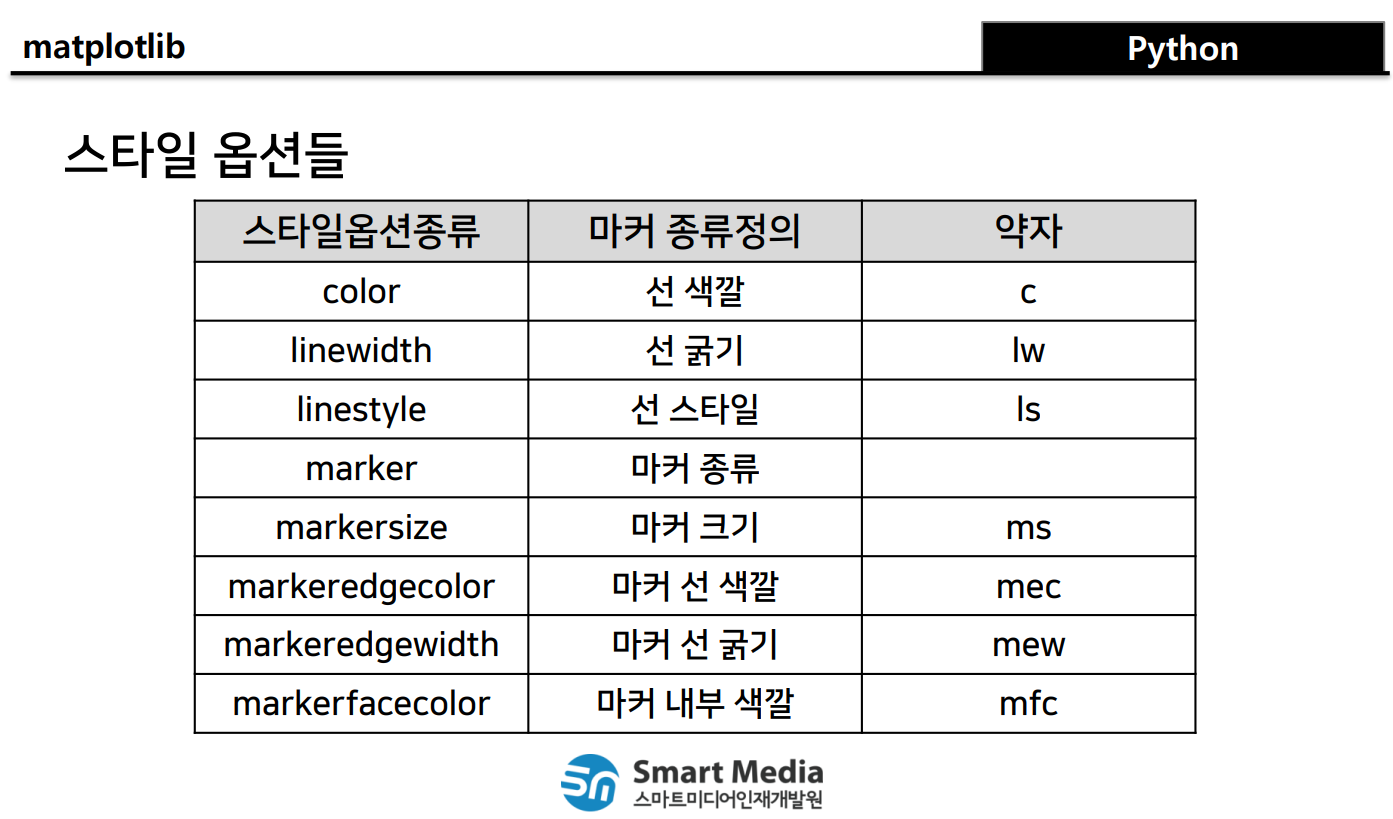

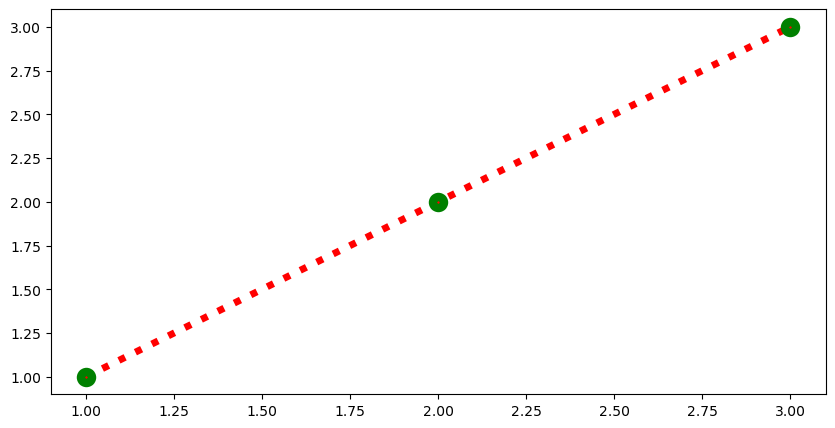

In [18]:
plt.figure(figsize=(10,5)) #가로, 세로(인치)
x = [1,2,3]
y = [1,2,3]
plt.plot(x,y, ls=":", # - / -- / -. / :
         c="red",
         lw = 5,
         marker="o", # marker  o / ^ / * / + / >
         mec = 'green',
         mew = 8 )
plt.show()

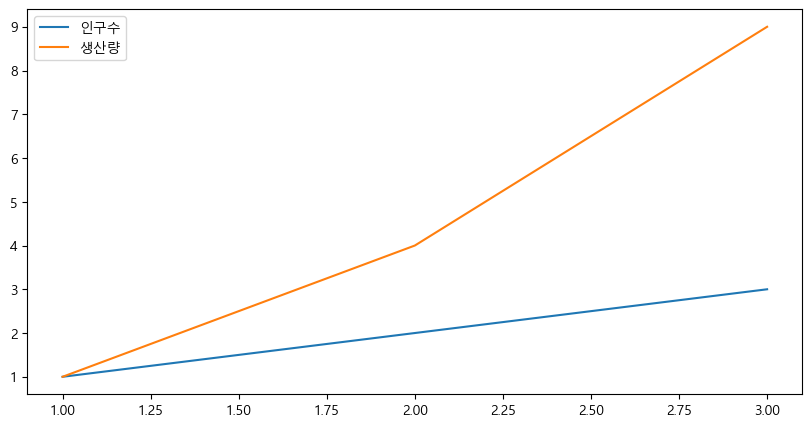

In [23]:
# 여러개를 차트에 그리기 
plt.figure(figsize=(10,5))

plt.plot([1,2,3], [1,2,3], label = "인구수")
plt.plot([1,2,3], [1,4,9], label = "생산량")

# 범례
plt.legend()

plt.show()

#### 3. bar 차트
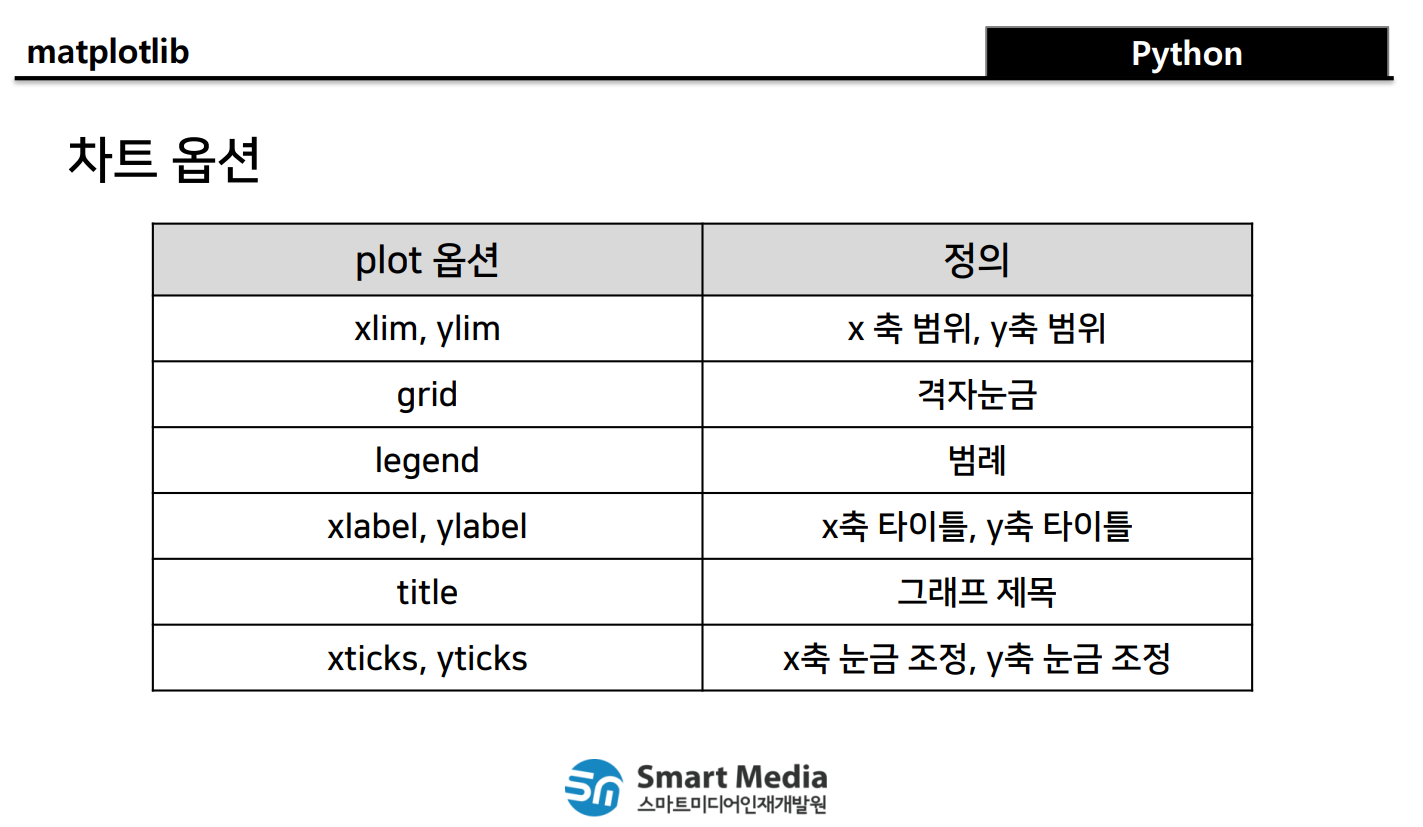

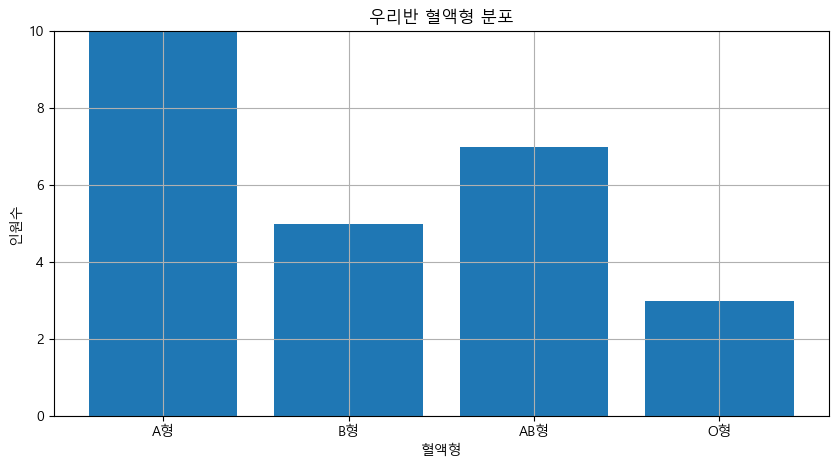

In [29]:
plt.figure(figsize=(10,5))

#bar차트 -> 범주형 데이터와 수치형 데이터를 그릴 때 
x = ['A형', 'B형', 'AB형', 'O형']
y = [100000, 5, 7, 3]

plt.bar(x,y)
plt.ylim(0,10)
plt.xlabel("혈액형")
plt.ylabel("인원수")
plt.title("우리반 혈액형 분포")
plt.grid() 

plt.show()

#### cctv 데이터 실습

In [2]:
import pandas as pd 

In [3]:
cctv = pd.read_csv("./data/광주광역시_CCTV.CSV", encoding = 'euc-kr')
cctv.head()

,관리기관명,소재지지번주소,소재지도로명주소,카메라대수,카메라화소,촬영방면,보관일수,설치연도,위도,경도,데이터기준일자
0,광주광역시 사회재난과,광산구 광산동 666-7,광산구 고봉로 905,2,200만,360도,30일,2018,35.225272,126.735854,2023-12-31
1,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1,200만,360도,30일,2013,35.162851,126.699911,2023-12-31
2,광주광역시 사회재난과,광산구 도덕동 320-15,광산구 삼도로 342,1,200만,360도,30일,2022,35.162851,126.699911,2023-12-31
3,광주광역시 사회재난과,광산구 도산동 1128-4,광산구 도산로9번길 58,4,200만,360도,30일,2020,35.127057,126.789353,2023-12-31
4,광주광역시 사회재난과,광산구 도산동 1282-1,광산구 남동길48번길 25,1,200만,360도,30일,2013,35.130739,126.789865,2023-12-31


In [47]:
cctv["동이름"] = cctv.loc[:, '소재지지번주소'].str.split(" ").str[1]
cctv_count =cctv.groupby(by="동이름")["카메라대수"].sum()

동이름
각화동     55
건국동      2
계림동    169
고룡동      3
광산동      6
      ... 
화장동      2
화정동    356
황금동      8
효령동     14
흑석동     41
Name: 카메라대수, Length: 182, dtype: int64

In [58]:
cctv_count.index

Index(['각화동', '건국동', '계림동', '고룡동', '광산동', '광천동', '구동', '구소동', '궁동', '금곡동',
       ...
       '하남동', '하산동', '학동', '행암동', '호남동', '화장동', '화정동', '황금동', '효령동', '흑석동'],
      dtype='object', name='동이름', length=182)

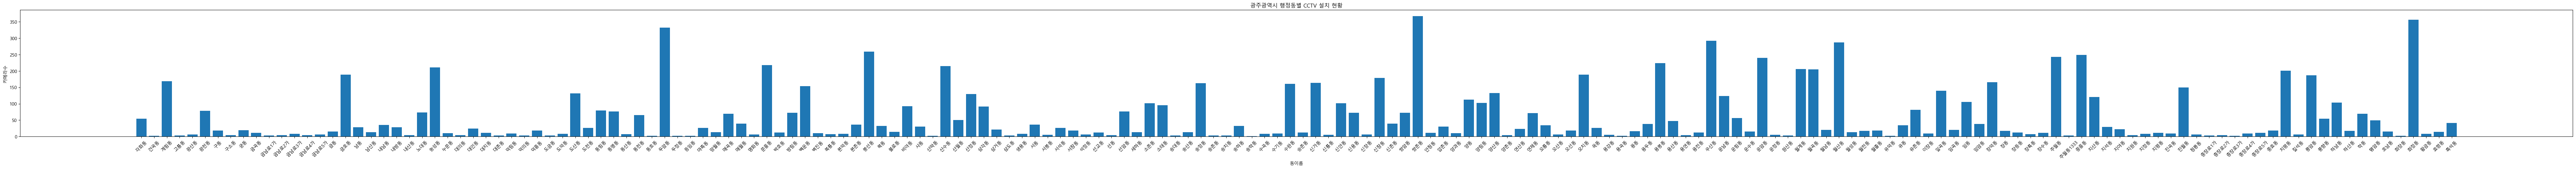

In [62]:
plt.figure(figsize=(100,5))

plt.xlabel('동이름')
plt.ylabel('카메라수')
plt.title('광주광역시 행정동별 CCTV 설치 현황')
plt.xticks(rotation=45) # x축 눈금 45도 회전 


#bar차트 -> 범주형 데이터와 수치형 데이터를 그릴 때 
x = cctv_count.index
y = cctv_count

plt.bar(x,y)
plt.savefig("./Gwangju_CCTV.png") #이미지로 저장 
plt.show()